In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import warnings
warnings.simplefilter('ignore')

In [5]:
data = pd.read_csv("pokemon.csv")


In [6]:
data

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard
...,...,...,...,...
804,stakataka,Rock,Steel,NaN
805,blacephalon,Fire,Ghost,NaN
806,zeraora,Electric,NaN,NaN
807,meltan,Steel,NaN,NaN


In [8]:
data.value_counts("Type1")

Type1
Water       114
Normal      105
Grass        78
Bug          72
Psychic      53
Fire         53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Dragon       27
Ghost        27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64

In [9]:
data=data[data.Type1.isin([
    "Water",
    "Normal",
    "Grass",
    "Bug",
    "Fire",
    "Psychic",
    "Rock",
    "Electric",
    "Poison",
    "Ground",
    "Fighting"
]
)][['Name','Type1']]
data

,Name,Type1
0,bulbasaur,Grass
1,ivysaur,Grass
2,venusaur,Grass
3,charmander,Fire
4,charmeleon,Fire
...,...,...
802,poipole,Poison
803,naganadel,Poison
804,stakataka,Rock
805,blacephalon,Fire


In [10]:
data.shape

(656, 2)

In [11]:
data.Name.nunique()

656

In [13]:
import os 
import pandas
import cv2

In [14]:
imgage_df=[]

In [16]:
path_start = r"C:\Users\KIIT0001\Desktop\jp notebook\project\pokemon\images"


In [21]:

for filename in os.listdir(path_start):
    if filename.lower().endswith(".png"):
        image_name = filename.rsplit(".", 1)[0]
        img_path = os.path.join(path_start, filename)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        rows.append({"Name": image_name, "img": image})

image_df = pd.DataFrame(image_df)


In [22]:
data=data.merge(image_df,how='inner', on='Name')

In [23]:
data.img.info()

<class 'pandas.core.series.Series'>
RangeIndex: 655 entries, 0 to 654
Series name: img
Non-Null Count  Dtype 
--------------  ----- 
655 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


In [24]:
data.value_counts('Type1')

Type1
Water       114
Normal      104
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Fighting     29
Name: count, dtype: int64

In [25]:
data.loc[0].img.shape

(120, 120, 3)

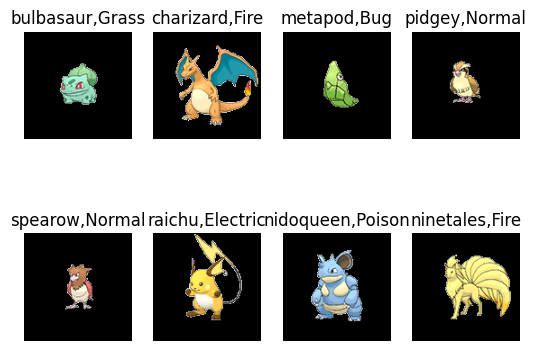

In [26]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data.loc[i*5].img)
    plt.title(f"{data.loc[i*5].Name},{data.loc[i*5].Type1}")
    plt.axis("off")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split


In [29]:
X= np.array(data['img'].tolist(), dtype = np.float32)/255
y=data['Type1']

In [35]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img


In [36]:
datagen = ImageDataGenerator(rotation_range = 15 , width_shift_range= 0.2, height_shift_range = 0.2, shear_range=0.2 , zoom_range = 0.2, horizontal_flip=True)

In [37]:
argumented_images = []
argumented_lables = []

In [41]:
augmented_images = []
augmented_labels = []

for i in range(len(X)):
    image = X[i]
    label = y[i]

    image = np.expand_dims(image, axis=0)           
    label = np.array([label])                        

    j = 0
    for batch in datagen.flow(image, label, batch_size=4):
        x_batch, y_batch = batch                     
        augmented_images.extend(list(x_batch))
        augmented_labels.extend(list(y_batch))
        j += 1
        if j >= 3:
            break

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)


In [42]:
print(X.shape)
print(augmented_images.shape)

(655, 120, 120, 3)
(1965, 120, 120, 3)


In [45]:
X=np.concatenate((X, augmented_images), axis=0)
y=np.concatenate((y,augmented_labels), axis=0)
print(X.shape)

(4585, 120, 120, 3)


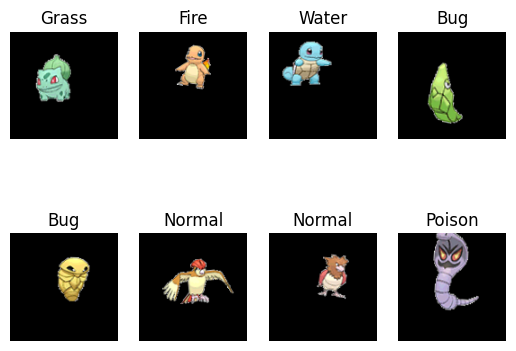

In [47]:
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(augmented_images[i*10])
    plt.title(f"{augmented_labels[i*10]}")
    plt.axis('off')
plt.show()

In [48]:
labels_dict=type_dict = {
    "Water": 0,
    "Normal": 1,
    "Grass": 2,
    "Bug": 3,
    "Fire": 4,
    "Psychic": 5,
    "Rock": 6,
    "Electric": 7,
    "Poison": 8,
    "Ground": 9,
    "Fighting": 10
}

In [49]:
y_final = []
for yi in y:
    y_final.append(labels_dict[yi])


X_train, X_test, y_train, y_test=train_test_split(X,y_final, test_size=.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                  input_shape=(120, 120, 3),
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])


In [52]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 118, 118, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 57, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,863,691 (10.92 MB)

 Trainable params: 2,863,691 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
histor=cnn.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 98s 817ms/step - accuracy: 0.2306 - loss: 2.6830 - val_accuracy: 0.2770 - val_loss: 2.2765
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 92s 797ms/step - accuracy: 0.3272 - loss: 2.1170 - val_accuracy: 0.3206 - val_loss: 2.1124
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 94s 821ms/step - accuracy: 0.4046 - loss: 1.9045 - val_accuracy: 0.3740 - val_loss: 1.9544
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 92s 802ms/step - accuracy: 0.4471 - loss: 1.7493 - val_accuracy: 0.4057 - val_loss: 1.9146
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 97s 844ms/step - accuracy: 0.5136 - loss: 1.5707 - val_accuracy: 0.4427 - val_loss: 1.7636
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 94s 817ms/step - accuracy: 0.5832 - loss: 1.3987 - val_accuracy: 0.5027 - val_loss: 1.7175
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 93s 807ms/step - accuracy: 0.6412 - loss: 1.2079 - val_accuracy: 0.4907 - val_loss: 1.7365
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 691ms/step - accuracy: 0.7197 - loss: 1

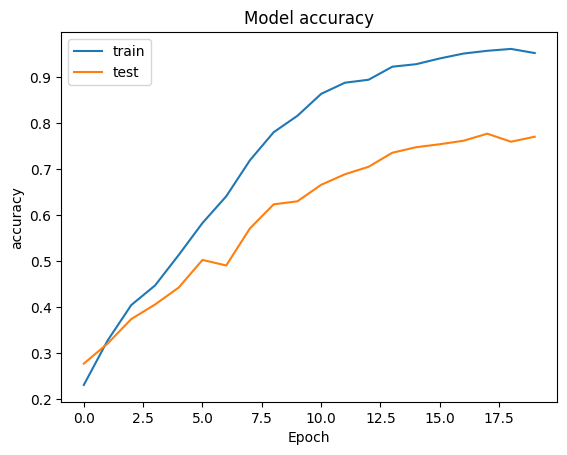

In [54]:
plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

In [55]:
y_pred=np.argmax(cnn.predict(X_test),axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step


In [56]:
# Ensure model is saved from training
# model.save("pokemon_cnn.h5")  # run this once after training

# Write one-file Flask app without JSON
app_code = r"""<paste the full code above here>"""
with open("app.py", "w", encoding="utf-8") as f:
    f.write(app_code)
print("Wrote app.py")

# Now from a terminal:
# pip install flask tensorflow pillow
# python app.py


Wrote app.py


In [57]:
# if the trained variable is named cnn in the notebook, use cnn.save(...)
cnn.save("pokemon_cnn.h5")   # saves to the current notebook folder


In [58]:
# in app.py, at the top near MODEL_PATH:
MODEL_PATH = r"C:\Users\KIIT0001\Desktop\jp notebook\project\pokemon\pokemon_cnn.h5"
# or keep relative like: MODEL_PATH = "models/pokemon_cnn.h5" and place the file there


In [59]:
import os
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"MODEL_PATH not found: {MODEL_PATH}")
